The main goal of this notebook is to obtain metadata and audio features of lyrics of `Evanescence` and `Within Temptation`. The code presented here can be used to retrieve information about any artist(s).

The information is retrieved using [`Spotify API`](https://developer.spotify.com/documentation/web-api/). To have access to Spotify API is necessary to request credentials [here](https://developer.spotify.com/dashboard/login). 

I'll be using Spotipy which is a lightweight Python library for the [Spotify Web API](https://developer.spotify.com/documentation/web-api/).

A certain path will be followed in order to retrieve the information I'm interested in. While following this path illustrated in the image bellow I'll perform some EDA and answer some questions about `Evanescence` and `Within Temptation`.

![Spotify information retrieval path](./images/spotify_path.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-packages" data-toc-modified-id="Load-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Load packages</strong></a></span></li><li><span><a href="#Access-to-Spotify-API" data-toc-modified-id="Access-to-Spotify-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Access to Spotify API</strong></a></span></li><li><span><a href="#Retrieving-information-about-an-artist" data-toc-modified-id="Retrieving-information-about-an-artist-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Retrieving information about an artist</strong></a></span><ul class="toc-item"><li><span><a href="#Who-is-more-popular-:-Evanescence-or-Within-Temptation-?" data-toc-modified-id="Who-is-more-popular-:-Evanescence-or-Within-Temptation-?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Who is more popular : Evanescence or Within Temptation ?</a></span></li><li><span><a href="#Which-genres-and-artists-are-related-to-Evanescence-or-Within-Temptation-?" data-toc-modified-id="Which-genres-and-artists-are-related-to-Evanescence-or-Within-Temptation-?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Which genres and artists are related to Evanescence or Within Temptation ?</a></span><ul class="toc-item"><li><span><a href="#Which-genres-are-associated-with-each-band-according-to-Spotify?" data-toc-modified-id="Which-genres-are-associated-with-each-band-according-to-Spotify?-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Which genres are associated with each band according to Spotify?</a></span></li><li><span><a href="#Which-related-artists-Evanescence-and-Within-Temptation-have-in-common-considering-the-listeners-of-Spotify?" data-toc-modified-id="Which-related-artists-Evanescence-and-Within-Temptation-have-in-common-considering-the-listeners-of-Spotify?-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Which related artists Evanescence and Within Temptation have in common considering the listeners of Spotify?</a></span></li></ul></li><li><span><a href="#Artist-top-tracks-🎙️" data-toc-modified-id="Artist-top-tracks-🎙️-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong>Artist top tracks</strong> 🎙️</a></span><ul class="toc-item"><li><span><a href="#Evanescence-Top-10-tracks-in-USA" data-toc-modified-id="Evanescence-Top-10-tracks-in-USA-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Evanescence Top 10 tracks in USA</a></span></li><li><span><a href="#Evanescence-Top-10-tracks-in-the-Netherlands" data-toc-modified-id="Evanescence-Top-10-tracks-in-the-Netherlands-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Evanescence Top 10 tracks in the Netherlands</a></span></li><li><span><a href="#Within-Temptation-Top-10-tracks-in-USA" data-toc-modified-id="Within-Temptation-Top-10-tracks-in-USA-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Within Temptation Top 10 tracks in USA</a></span></li><li><span><a href="#Within-Temptation-Top-10-tracks-in-The-Netherlands" data-toc-modified-id="Within-Temptation-Top-10-tracks-in-The-Netherlands-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Within Temptation Top 10 tracks in The Netherlands</a></span></li></ul></li></ul></li><li><span><a href="#Retrieving-album's-information" data-toc-modified-id="Retrieving-album's-information-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Retrieving album's information</strong></a></span><ul class="toc-item"><li><span><a href="#Albums-information---Evanescence" data-toc-modified-id="Albums-information---Evanescence-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Albums information - Evanescence</a></span></li><li><span><a href="#Albums-information---Within-Temptation" data-toc-modified-id="Albums-information---Within-Temptation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Albums information - Within Temptation</a></span></li><li><span><a href="#Keep-only-albums-of-the-artist-of-interest" data-toc-modified-id="Keep-only-albums-of-the-artist-of-interest-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Keep only albums of the artist of interest</a></span><ul class="toc-item"><li><span><a href="#Evanescence" data-toc-modified-id="Evanescence-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Evanescence</a></span></li><li><span><a href="#Within-Temptation" data-toc-modified-id="Within-Temptation-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Within Temptation</a></span></li></ul></li></ul></li><li><span><a href="#Retrieving-tracks-information" data-toc-modified-id="Retrieving-tracks-information-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Retrieving tracks information</strong></a></span><ul class="toc-item"><li><span><a href="#Retrieving-for-a-single-album" data-toc-modified-id="Retrieving-for-a-single-album-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Retrieving for a single album</a></span><ul class="toc-item"><li><span><a href="#Evanescence" data-toc-modified-id="Evanescence-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Evanescence</a></span></li><li><span><a href="#Within-Temptation" data-toc-modified-id="Within-Temptation-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Within Temptation</a></span></li></ul></li></ul></li><li><span><a href="#Retrieving-tracks-information-for-all-albums-from-both-bands" data-toc-modified-id="Retrieving-tracks-information-for-all-albums-from-both-bands-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Retrieving tracks information for all albums from both bands</strong></a></span><ul class="toc-item"><li><span><a href="#Information-tracks---Evanescence" data-toc-modified-id="Information-tracks---Evanescence-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Information tracks - Evanescence</a></span></li><li><span><a href="#Information-tracks---Within-Temptation" data-toc-modified-id="Information-tracks---Within-Temptation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Information tracks - Within Temptation</a></span></li></ul></li><li><span><a href="#Snippets" data-toc-modified-id="Snippets-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Snippets</strong></a></span><ul class="toc-item"><li><span><a href="#Evanescence" data-toc-modified-id="Evanescence-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Evanescence</a></span></li><li><span><a href="#Within-Temptation" data-toc-modified-id="Within-Temptation-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Within Temptation</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><strong>Conclusions</strong></a></span></li></ul></div>

# **Load packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image, HTML
import time
import emoji

import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

pd.set_option('display.max_colwidth', 0)
sns.set(style="whitegrid")
%matplotlib inline

TodaysDate = time.strftime("%Y-%m-%d")


# **Access to Spotify API**

To use your credentials create `credentials.py` with your credentials and keep it at the same folder as this notebook. And replace `private` by `credentials` in the cell bellow.

In [2]:
try:
    import private # .py file with my credentials 
    # maybe redirect uri will be required for some of the commands 
    redirect_uri = private.redirect_uri

    # credentials
    username = private.username
    client_id=private.cid 
    client_secret=private.secret

except ModuleNotFoundError:
    import credentials # have the credentials of another user
    redirect_uri = credentials.redirect_uri

    # credentials
    username = credentials.username
    client_id=credentials.cid
    client_secret=credentials.secret   
    
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


# **Retrieving information about an artist**

Spotipy supports a number of different ID types:

`Spotify URI` - The resource identifier that you can enter, for example, in the Spotify Desktop client’s search box to locate an artist, album, or track. Example: `spotify:track:6rqhFgbbKwnb9MLmUQDhG6`

`Spotify URL` - An HTML link that opens a track, album, app, playlist or other Spotify resource in a Spotify client. Example: `http://open.spotify.com/track/6rqhFgbbKwnb9MLmUQDhG6`

`Spotify ID` - A base-62 number that you can find at the end of the Spotify URI (see above) for an artist, track, album, etc. Example: `6rqhFgbbKwnb9MLmUQDhG6`

In general, any Spotipy method that needs an _artist, album, track or playlist ID_ will accept ids in any of the above form.

**source: https://spotipy.readthedocs.io/en/latest/#ids-uris-and-urls**

In order to retrieve information about an artist we need to retrieve one of these IDs, for this we use the method `search`. In the function below we will use this and other methods from Spotipy to retrieve information about an artist.


In [3]:
def retrieve_artist_info(artist):
    
    """ 
    
    Retrieve main information about an artist given artist's name which includes also name of bands.
    
    Input:
        artist : artist's name (string)
    
    Output:
        dictionary with main info about artist, including related artist. 
        
    """
    
    # find artist by name and extract uri
    
    artist_uri = sp.search(q='artist:' + artist, type='artist')['artists']['items'][0]['uri']
    
    # Extract info about artist
    
    artist_info = sp.artist(artist_uri)
    
    # Obtain list of related artists. Similarity is based on analysis of the Spotify community’s listening history.

    related = sp.artist_related_artists(artist_uri)
    
    related_artists = []

    for idx in range(len(related['artists'])):
        related_artists.append(related['artists'][idx]['name'])
    
    return {'id': artist_info['id'],
            'name' : artist_info['name'],
            'genres': ', '.join(artist_info['genres']),
            'artist_popularity' : artist_info['popularity'],
            'num_followers' : artist_info['followers']['total'],
            'related_artists': ', '.join(related_artists),
            'external_urls': artist_info['external_urls']['spotify'],
            'uri': artist_uri}
    

In [4]:
def build_dataframe_artists_info(list_artists):
    """ 
    Build a dataframe with info from a list of artists (names of artists)
    """
    
    all_info = []

    for name in list_artists:
        all_info.append(retrieve_artist_info(name))
        
    return pd.DataFrame(all_info)
    

In [5]:
df = build_dataframe_artists_info(['evanescence','within temptation'])
df.columns

Index(['id', 'name', 'genres', 'artist_popularity', 'num_followers',
       'related_artists', 'external_urls', 'uri'],
      dtype='object')

In [6]:
# selecting only the columns I'm interested in

df = df[['name', 'genres', 'artist_popularity', 'num_followers',
       'related_artists']]

df

,name,genres,artist_popularity,num_followers,related_artists
0,Evanescence,"alternative metal, post-grunge",74,2640635,"Amy Lee, We Are The Fallen, Within Temptation, Flyleaf, Lacuna Coil, Delain, Seether, Epica, Apocalyptica, Tarja, The Rasmus, Halestorm, In This Moment, Nightwish, Hoobastank, Red, Three Days Grace, Sirenia, The Pretty Reckless, 3 Doors Down"
1,Within Temptation,"dutch metal, gothic metal, gothic symphonic metal, power metal, symphonic metal",67,776916,"Leaves' Eyes, Delain, Epica, Tarja, Visions of Atlantis, Nemesea, Sirenia, Amberian Dawn, Tristania, Lunatica, Theatre Of Tragedy, After Forever, Xandria, Lacuna Coil, Stream of Passion, Nightwish, Edenbridge, Krypteria, Therion, We Are The Fallen"


## Who is more popular : Evanescence or Within Temptation ?

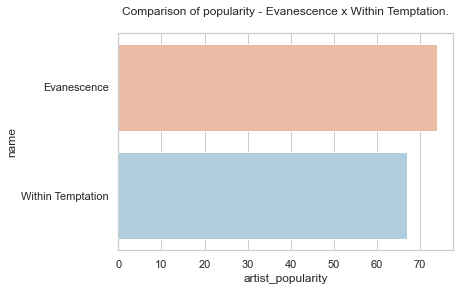

In [7]:
plt.title("Comparison of popularity - Evanescence x Within Temptation.\n")
sns.barplot(data=df, y='name',x='artist_popularity', palette = 'RdBu')


The data retrieved from Spotify shows that Evanescence is a bit more popular than Within Temptation.

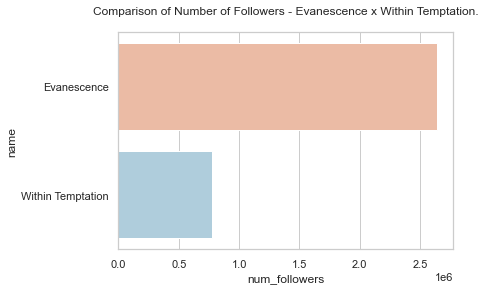

In [8]:
plt.title("Comparison of Number of Followers - Evanescence x Within Temptation.\n")
sns.barplot(data=df, y='name',x='num_followers',palette = 'RdBu')


Evanescence have almost 4x more followers in Spotify than Within Temptation.

## Which genres and artists are related to Evanescence or Within Temptation ?

Spotify associates to each artist some genres. Will Evanescence and Within Temptation be associated with same genres? Both are known as rock bands (https://en.wikipedia.org/wiki/Evanescence, https://en.wikipedia.org/wiki/Within_Temptation), but not only this. Which other genres will Spotify point to them?

And which artists are related to them? Will they share related artists?

In [9]:
# Generate word clouds with genres related to each band 

evanescence_genres_word_cloud = WordCloud(background_color="black",random_state=123,colormap='Reds').generate(df['genres'][df['name']=='Evanescence'][0])
within_genres_word_cloud = WordCloud(background_color="black",random_state=123,colormap='Blues').generate(df['genres'][df['name']=='Within Temptation'][1])


### Which genres are associated with each band according to Spotify?

(-0.5, 399.5, 199.5, -0.5)

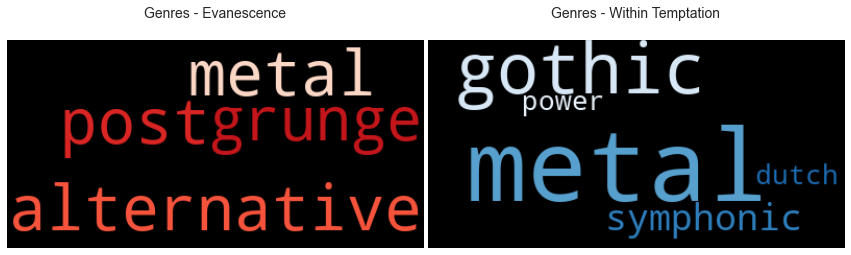

In [10]:
fig = plt.figure(figsize = (15,15))
plt.subplots_adjust(wspace=0.01)
plt.subplot(221)
plt.title("Genres - Evanescence\n", fontsize = 14 )
plt.imshow(evanescence_genres_word_cloud, interpolation="bilinear")
plt.axis('off')
plt.subplot(222)
plt.title("Genres - Within Temptation\n", fontsize = 14 )
plt.imshow(within_genres_word_cloud, interpolation="bilinear")
plt.axis('off')

The only genre pointed as common is `metal`. No rock was pointed out and I'd think that gothic could be associated with both.

### Which related artists Evanescence and Within Temptation have in common considering the listeners of Spotify?

In [11]:
common_artists = set(df['related_artists'][df['name']=='Evanescence'][0].split(',')).intersection(set(df['related_artists'][df['name']=='Within Temptation'][1].split(',')))
common_artists=','.join(common_artists)

evanescence_artists_wc = WordCloud(background_color="black",random_state=123,colormap='Reds').generate(df['related_artists'][df['name']=='Evanescence'][0])
within_artists_wc = WordCloud(background_color="black",random_state=123,colormap='Blues').generate(df['related_artists'][df['name']=='Within Temptation'][1])
common_artists_wc = WordCloud(background_color="black",random_state=123,colormap='Purples').generate(common_artists)

(-0.5, 399.5, 199.5, -0.5)

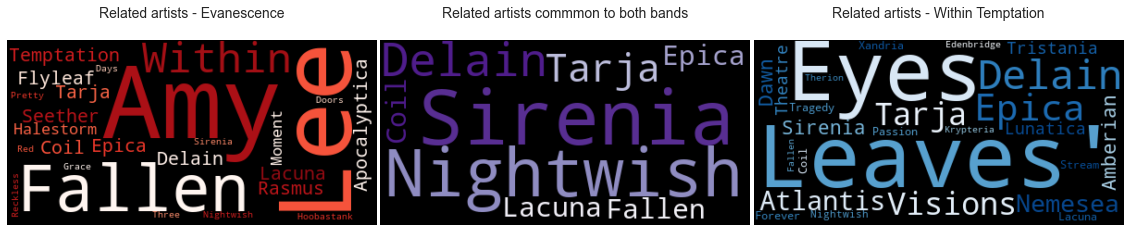

In [12]:
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(wspace=0.01)
plt.subplot(231)
plt.title("Related artists - Evanescence\n", fontsize = 14 )
plt.imshow(evanescence_artists_wc, interpolation="bilinear")
plt.axis('off')
plt.subplot(232)
plt.title("Related artists commmon to both bands\n", fontsize = 14 )
plt.imshow(common_artists_wc, interpolation="bilinear")
plt.axis('off')
plt.subplot(233)
plt.title("Related artists - Within Temptation\n", fontsize = 14 )
plt.imshow(within_artists_wc, interpolation="bilinear")
plt.axis('off')

In [13]:
print("So we can say that people that like `Evanescence` and `Within Temptation` also appreciate","\033[1m"+common_artists+"\033[0m")

So we can say that people that like `Evanescence` and `Within Temptation` also appreciate  Sirenia, Nightwish, Delain, Tarja, We Are The Fallen, Lacuna Coil, Epica


In a recommender system point of view we could recommend people to explore this bands 😉

**Remark:** : Probably when you run the code the result will be different since the behaviour of the listeners in Spotify also changes with time.

## **Artist top tracks** 🎙️ 

**Track's Popularity:** Track's popularity has a value between 0 and 100, with 100 being the most popular. It is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

source: https://developer.spotify.com/documentation/web-api/reference/artists/get-artists-top-tracks/


In [14]:
def top_tracks_by_country(artist_id, country = 'US'):
    """ 
    Get Spotify catalog information about an artist’s top 10 tracks by country. 
    """
    
    track_name = []
    track_id = []
    track_popularity = []

    top = sp.artist_top_tracks(artist_id, country)
    
    for idx in range(len(top['tracks'])):
        track_name.append(top['tracks'][idx]['name'])
        track_id.append(top['tracks'][idx]['id'])
        track_popularity.append(top['tracks'][idx]['popularity'])
        
    dict_top = {'track_id': track_id,
               'track_name': track_name,
               'track_popularity': track_popularity}
    df = pd.DataFrame(dict_top)
    df.sort_values('track_popularity', inplace = True, ascending = False)
    df.reset_index(drop = True, inplace = True)
        
    return df

### Evanescence Top 10 tracks in USA

In [15]:
evanescence_id = retrieve_artist_info('evanescence')['id']
df_evanescence_US = top_tracks_by_country(evanescence_id)
df_evanescence_US

,track_id,track_name,track_popularity
0,0COqiPhxzoWICwFCS4eZcp,Bring Me To Life,79
1,4UzVcXufOhGUwF56HT7b8M,My Immortal,74
2,3UygY7qW2cvG9Llkay6i1i,Going Under,69
3,663Karu2rvKLdnY0eo1n3M,Call Me When You're Sober,65
4,0tWEB6BxbI48XN79QE1JbT,Everybody's Fool,63
5,3XN5MbVdTPLfdQcP07YO5O,Wasted On You,62
6,5YaLFRpqpUzgLLDcukNn0H,Lithium,61
7,0aYUqsvZG7bAslrUkd9Z0g,Hello,58
8,46fyLy4W9HhAkcb67kLaAV,Tourniquet,58
9,6Z77oDcn6iI1MHFCBPjl24,Haunted,55


### Evanescence Top 10 tracks in the Netherlands

In [16]:
df_evanescence_NL = top_tracks_by_country(evanescence_id, country='NL')
df_evanescence_NL

,track_id,track_name,track_popularity
0,0COqiPhxzoWICwFCS4eZcp,Bring Me To Life,79
1,4UzVcXufOhGUwF56HT7b8M,My Immortal,74
2,3UygY7qW2cvG9Llkay6i1i,Going Under,69
3,663Karu2rvKLdnY0eo1n3M,Call Me When You're Sober,65
4,0tWEB6BxbI48XN79QE1JbT,Everybody's Fool,63
5,5YaLFRpqpUzgLLDcukNn0H,Lithium,61
6,7ui6fTzMeE6JCr0GWvc14n,Wasted On You,59
7,0aYUqsvZG7bAslrUkd9Z0g,Hello,58
8,46fyLy4W9HhAkcb67kLaAV,Tourniquet,58
9,6Z77oDcn6iI1MHFCBPjl24,Haunted,55


In [17]:
df_evanescence_US.equals(df_evanescence_NL)

False

In [18]:
set(df_evanescence_US['track_name']).difference(set(df_evanescence_NL['track_name']))

set()

Both countries have the same songs in the top 10 for Evanescence. However, the popularity ranking is not the same. For instances, `Lithium` is in position 7th in USA and position 6th in the Netherlands. (30/05/20)  

In [19]:
df_top10_evanescence = df_evanescence_US.merge(df_evanescence_NL,on='track_name', suffixes=('_US', '_NL'))
df_top10_evanescence[['track_name', 'track_popularity_US','track_popularity_NL']]

,track_name,track_popularity_US,track_popularity_NL
0,Bring Me To Life,79,79
1,My Immortal,74,74
2,Going Under,69,69
3,Call Me When You're Sober,65,65
4,Everybody's Fool,63,63
5,Wasted On You,62,59
6,Lithium,61,61
7,Hello,58,58
8,Tourniquet,58,58
9,Haunted,55,55


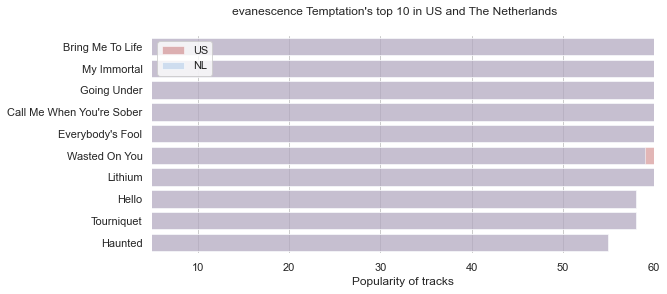

In [20]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 4))

# Plot top 10 in US
sns.set_color_codes("muted")
sns.barplot(x="track_popularity_US", y="track_name", data=df_top10_evanescence,
            label="US", color="r", alpha = 0.5)

# Plot top 10 in NL
sns.set_color_codes("pastel")
sns.barplot(x="track_popularity_NL", y="track_name", data=df_top10_evanescence,
            label="NL", color="b", alpha = 0.5)

# Add a legend and informative axis label
f.suptitle("evanescence Temptation's top 10 in US and The Netherlands")
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlim=(5, 60), ylabel="",
       xlabel="Popularity of tracks")
sns.despine(left=True, bottom=True)




And what about withing Temptation?

In [21]:
within_temptation_id = retrieve_artist_info('within temptation')['id']

In [22]:
df_within_temptation_US = top_tracks_by_country(within_temptation_id)
df_within_temptation_NL = top_tracks_by_country(within_temptation_id, country = 'NL')
df_within_temptation_US.equals(df_within_temptation_NL)

False

It seems that the taste of americans and dutchs also differ when we talk about Within Temptation. Let's see which one are the top 10 in both countries.

### Within Temptation Top 10 tracks in USA

In [23]:
df_within_temptation_US

,track_id,track_name,track_popularity
0,70HVKogWbgiA4XaXa2GowH,Entertain You,61
1,4BhqnM5lktowwfHqq2JYhg,All I Need,58
2,6XnPopwCZ6odHVVqMsllL5,The Reckoning,57
3,3TEwbiC0GhIRStn3Eabtu7,Angels,56
4,15z9QEJOBV6hDdWsdZwDKP,Stand My Ground,55
5,5oX5jpeZsXBWEheqE0qqqD,Faster,53
6,66wcihY2Y8ZSqux6EivMWa,What Have You Done (feat. Keith Caputo),53
7,4GBbBy05LoSveNxjKxj26m,Supernova,53
8,17AtQU2FNV14jSGpPfhejn,Memories,51
9,1Txptxzzcc7PBD7NSsJQWs,Paradise (What About Us?),40


### Within Temptation Top 10 tracks in The Netherlands

In [24]:
df_within_temptation_NL

,track_id,track_name,track_popularity
0,70HVKogWbgiA4XaXa2GowH,Entertain You,61
1,4BhqnM5lktowwfHqq2JYhg,All I Need,58
2,6XnPopwCZ6odHVVqMsllL5,The Reckoning,57
3,3TEwbiC0GhIRStn3Eabtu7,Angels,56
4,15z9QEJOBV6hDdWsdZwDKP,Stand My Ground,55
5,28HX0PibeXSL6cfAsvwSgD,Faster,55
6,66wcihY2Y8ZSqux6EivMWa,What Have You Done (feat. Keith Caputo),53
7,4GBbBy05LoSveNxjKxj26m,Supernova,53
8,2Sp8T3BrAHQmWwl9jLexDF,Paradise (What About Us?) [feat. Tarja],53
9,17AtQU2FNV14jSGpPfhejn,Memories,51


At the end both countries like the same songs. The difference is in the hackings of _Paradise_ and _Memories_. _Memories_ is in the 9th position in the USA ranking while in The Netherlands it occupies the 10th position. 

In [25]:
# some cleaning so both dataframes have exactly the same track_names
df_within_temptation_NL['track_name']=df_within_temptation_NL['track_name'].apply(lambda x: x.replace('[feat. Tarja]','').strip())
df_within_temptation_NL

,track_id,track_name,track_popularity
0,70HVKogWbgiA4XaXa2GowH,Entertain You,61
1,4BhqnM5lktowwfHqq2JYhg,All I Need,58
2,6XnPopwCZ6odHVVqMsllL5,The Reckoning,57
3,3TEwbiC0GhIRStn3Eabtu7,Angels,56
4,15z9QEJOBV6hDdWsdZwDKP,Stand My Ground,55
5,28HX0PibeXSL6cfAsvwSgD,Faster,55
6,66wcihY2Y8ZSqux6EivMWa,What Have You Done (feat. Keith Caputo),53
7,4GBbBy05LoSveNxjKxj26m,Supernova,53
8,2Sp8T3BrAHQmWwl9jLexDF,Paradise (What About Us?),53
9,17AtQU2FNV14jSGpPfhejn,Memories,51


In [26]:
df_top10_within = df_within_temptation_US.merge(df_within_temptation_NL,on='track_name', suffixes=('_US', '_NL'))
df_top10_within[['track_name', 'track_popularity_US','track_popularity_NL']]

,track_name,track_popularity_US,track_popularity_NL
0,Entertain You,61,61
1,All I Need,58,58
2,The Reckoning,57,57
3,Angels,56,56
4,Stand My Ground,55,55
5,Faster,53,55
6,What Have You Done (feat. Keith Caputo),53,53
7,Supernova,53,53
8,Memories,51,51
9,Paradise (What About Us?),40,53


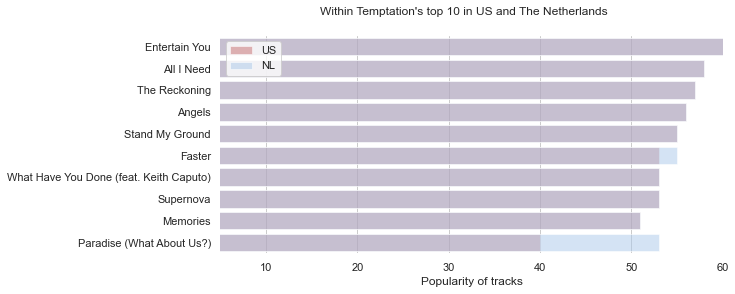

In [27]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 4))

# Plot top 10 in US
sns.set_color_codes("muted")
sns.barplot(x="track_popularity_US", y="track_name", data=df_top10_within,
            label="US", color="r", alpha = 0.5)

# Plot top 10 in NL
sns.set_color_codes("pastel")
sns.barplot(x="track_popularity_NL", y="track_name", data=df_top10_within,
            label="NL", color="b", alpha = 0.5)

# Add a legend and informative axis label
f.suptitle("Within Temptation's top 10 in US and The Netherlands")
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlim=(5, 60), ylabel="",
       xlabel="Popularity of tracks")
sns.despine(left=True, bottom=True)




Curious to hear snippets of the top 10? Let's include `preview url` to above dataframes so you can have a taste 😉 🎼 

In [28]:
def insert_preview_url(df):
    """ 
    Insert column with clickable link to snippet (30 seconds sample of a song) of songs.
    
    Input:
        df: Dataframe to have column with preview inserted. This dataframe contains a column with track_ids (df['track_id'])
    
    """
    
    list_preview_url = []

    for track_id in df['track_id']:
        list_preview_url.append(sp.track(track_id)['preview_url'])
        
    df['preview_url'] = list_preview_url
    
    def make_clickable(val):
        if val is None:
            return 'No preview available'
        else:
            return '<a target="_blank" href="{}">{}</a>'.format(val, val)

    return df.style.format({'preview_url': make_clickable})

In [29]:
# Updated dataframe with top 10 of Evanescence in The Netherlands

df = df_evanescence_NL
track_id_list = df_evanescence_NL['track_id']

df_evanescence_NL_preview = insert_preview_url(df)
df_evanescence_NL_preview

,track_id,track_name,track_popularity,preview_url
0,0COqiPhxzoWICwFCS4eZcp,Bring Me To Life,79,No preview available
1,4UzVcXufOhGUwF56HT7b8M,My Immortal,74,No preview available
2,3UygY7qW2cvG9Llkay6i1i,Going Under,69,No preview available
3,663Karu2rvKLdnY0eo1n3M,Call Me When You're Sober,65,No preview available
4,0tWEB6BxbI48XN79QE1JbT,Everybody's Fool,63,No preview available
5,5YaLFRpqpUzgLLDcukNn0H,Lithium,61,No preview available
6,7ui6fTzMeE6JCr0GWvc14n,Wasted On You,59,https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c
7,0aYUqsvZG7bAslrUkd9Z0g,Hello,58,No preview available
8,46fyLy4W9HhAkcb67kLaAV,Tourniquet,58,No preview available
9,6Z77oDcn6iI1MHFCBPjl24,Haunted,55,No preview available


In [30]:
# Updated dataframe with top 10 of Within Temptation in The Netherlands

df = df_within_temptation_NL
track_id_list = df_within_temptation_NL['track_id']

df_within_temptation_NL_preview = insert_preview_url(df)
df_within_temptation_NL_preview

,track_id,track_name,track_popularity,preview_url
0,70HVKogWbgiA4XaXa2GowH,Entertain You,61,https://p.scdn.co/mp3-preview/3bb74739f51b566347077a64e58688787fd87111?cid=63a77ff40e794a12ae216a18befde98c
1,4BhqnM5lktowwfHqq2JYhg,All I Need,58,https://p.scdn.co/mp3-preview/613509e6725e4792adb26010c84bad6eae562b44?cid=63a77ff40e794a12ae216a18befde98c
2,6XnPopwCZ6odHVVqMsllL5,The Reckoning,57,No preview available
3,3TEwbiC0GhIRStn3Eabtu7,Angels,56,https://p.scdn.co/mp3-preview/1dbf69a32db3b4d23f0311f2bfbd2afd40bfbfdf?cid=63a77ff40e794a12ae216a18befde98c
4,15z9QEJOBV6hDdWsdZwDKP,Stand My Ground,55,https://p.scdn.co/mp3-preview/86774c051d057643a6daaa1b1fdbdca0e2f7c2fc?cid=63a77ff40e794a12ae216a18befde98c
5,28HX0PibeXSL6cfAsvwSgD,Faster,55,https://p.scdn.co/mp3-preview/dbdeec5d31a3582fc06355d9c24d4fc49e7df7f7?cid=63a77ff40e794a12ae216a18befde98c
6,66wcihY2Y8ZSqux6EivMWa,What Have You Done (feat. Keith Caputo),53,https://p.scdn.co/mp3-preview/4969cdbad38904f03074b30f4a176c6c4408235c?cid=63a77ff40e794a12ae216a18befde98c
7,4GBbBy05LoSveNxjKxj26m,Supernova,53,No preview available
8,2Sp8T3BrAHQmWwl9jLexDF,Paradise (What About Us?),53,https://p.scdn.co/mp3-preview/a359f9e3b8d97551260d6d0205ddf9d2edbe76c6?cid=63a77ff40e794a12ae216a18befde98c
9,17AtQU2FNV14jSGpPfhejn,Memories,51,https://p.scdn.co/mp3-preview/5273e1ffb4bde07151663d8320a9a0235bb99a00?cid=63a77ff40e794a12ae216a18befde98c


Unfortunately, Spotify does not provide snippets for all songs. Bad surprise that no songs in the top 10 have no snippets. A shame... 😥

# **Retrieving album's information**

We have already retrieved and analysed some information about the bands. Now we will use their `artist_id` to retrieve information about their albuns.

In [31]:
def retrieve_albums_info(artist_id, file_name, limit = 50, max_nr_albums=2000):
    """ 
    Retrieve albums information of a given artist_id.
    
    Input:
        artist_id : The Spotify URI for the artist.
        file_name: name of the .csv that will have the information retrieved (without extension)
        
    Output:
        csv file with album information of a chosen artist
    
    
    """
    
    album_name = []
    album_id = []
    album_type = []
    artists = []
    release_date = []
    cover_album = []
    total_tracks = []
    available_markets = []
    total_available_markets = []
    album_uri = []

    for i in range(0,max_nr_albums,50):
        albums_per_artist = sp.artist_albums(artist_id, limit=limit, offset=i)
        for album in range(len(albums_per_artist['items'])):
            album_name.append(albums_per_artist['items'][album]['name'])
            album_id.append(albums_per_artist['items'][album]['id'])
            album_type.append(albums_per_artist['items'][album]['album_type'])
            artists.append(albums_per_artist['items'][album]['artists'][0]['name'])
            release_date.append(albums_per_artist['items'][album]['release_date'])
            cover_album.append(albums_per_artist['items'][album]['images'][0]['url'])
            total_tracks.append(albums_per_artist['items'][album]['total_tracks'])
            available_markets.append(','.join(albums_per_artist['items'][album]['available_markets']))
            total_available_markets.append(len(albums_per_artist['items'][album]['available_markets']))
        
            album_uri.append(albums_per_artist['items'][album]['uri'])

    dict_albums = {'album_name':album_name,
                   'album_id': album_id,
                   'album_type' : album_type,
                   'artists': artists,
                   'release_date' : release_date,
                   'cover_album':cover_album,
                   'total_tracks':total_tracks,
                   'available_markets': available_markets,
                   'total_available_markets':total_available_markets,
                  'album_uri': album_uri}

    # creating dataframe

    df = pd.DataFrame(dict_albums)
    
    # Ordering by date - most recent first
    
    df.sort_values(by='release_date', inplace = True)

    # dropping duplicates based on album_name and release_date

    df.drop_duplicates(subset=['album_name','release_date'], keep = 'first', inplace = True)
    
    # reset index
    
    df.reset_index(drop=True,inplace = True)
    
    # Create year column
    
    df['release_date'] = pd.to_datetime(df['release_date'],  format='%Y-%m-%d')
    
    df['release_year'] = df['release_date'].apply(lambda x: x.year)
    
    # Ordering
    
    df = df[['album_id', 'album_name', 'album_type', 'artists', 'release_year','release_date', 'cover_album',
            'total_tracks','available_markets','total_available_markets', 'album_uri']]

    # saving result in csv

    df.to_csv("./data/"+file_name+"_"+TodaysDate+".csv", index = False)
    
    return df


## Albums information - Evanescence

In [32]:
df_albums_evanescence = retrieve_albums_info(artist_id=retrieve_artist_info('evanescence')['id'], 
                                             file_name='info_Evanescence_albums', limit = 50, max_nr_albums=2000)
df_albums_evanescence.head()

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,02w1xMzzdF2OJxTeh1basm,Fallen,album,Evanescence,2003,2003-03-04,https://i.scdn.co/image/ab67616d0000b27325f49ab23f0ec6332efef432,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:02w1xMzzdF2OJxTeh1basm
1,5SpQ4sf9sXFWHgUKYCZSDF,Anywhere But Home (Live),album,Evanescence,2004,2004-01-01,https://i.scdn.co/image/ab67616d0000b273448aba708690c87f0b043b5b,14,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5SpQ4sf9sXFWHgUKYCZSDF
2,5oi50Gv8yvqAqPbWDdZhYA,Elektra: The Album,compilation,Various Artists,2005,2005-01-01,https://i.scdn.co/image/ab67616d0000b27305d3f73eed4ef3b671f94740,15,US,1,spotify:album:5oi50Gv8yvqAqPbWDdZhYA
3,3lFQ9ihSNR5YD0yi0yTzdC,The Open Door,album,Evanescence,2006,2006-01-01,https://i.scdn.co/image/ab67616d0000b2737b8aabae10ab5bbe7c7f11c5,13,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:3lFQ9ihSNR5YD0yi0yTzdC
4,7soKb31c9JTxBllcJ0J2KT,Now! 12,compilation,Various Artists,2007,2007-01-01,https://i.scdn.co/image/ab67616d0000b273d44a68a1cef90d4b4594561e,18,CA,1,spotify:album:7soKb31c9JTxBllcJ0J2KT


In [33]:
df_albums_evanescence.shape

(89, 11)

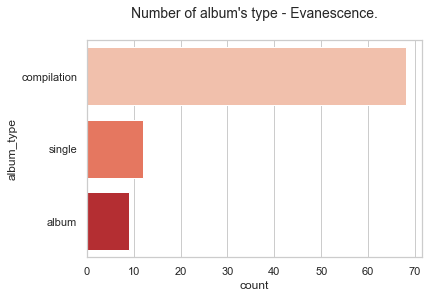

In [34]:
plt.title("Number of album's type - Evanescence.\n", fontsize = 14)
sns.countplot(data=df_albums_evanescence, y='album_type', palette = 'Reds', order = df_albums_evanescence['album_type'].value_counts().index)


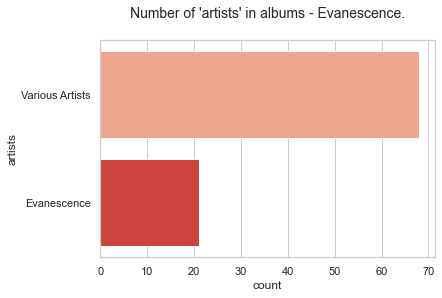

In [35]:
plt.title("Number of 'artists' in albums - Evanescence.\n", fontsize = 14)
sns.countplot(data=df_albums_evanescence, y='artists', palette = 'Reds', order = df_albums_evanescence['artists'].value_counts().index)


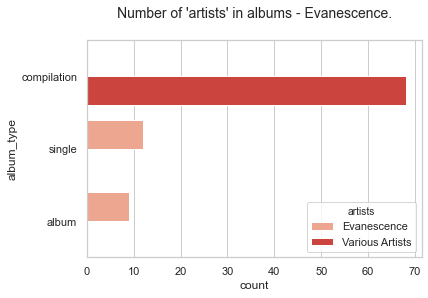

In [36]:
plt.title("Number of 'artists' in albums - Evanescence.\n", fontsize = 14)
sns.countplot(data=df_albums_evanescence, y='album_type', hue = 'artists', palette = 'Reds', order = df_albums_evanescence['album_type'].value_counts().index)


Then we can conclude that album types including only Evanescence are `single` and `album`.

## Albums information - Within Temptation

In [37]:
df_albums_within_temptation = retrieve_albums_info(artist_id=retrieve_artist_info('Within Temptation')['id'], 
                                             file_name='info_within_temptation_albums', limit = 50, max_nr_albums=2000)
df_albums_within_temptation.head()

retrying ...2secs


,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,4bHxlso02RaAgI7VRUpbrz,Enter,album,Within Temptation,1997,1997-04-06,https://i.scdn.co/image/ab67616d0000b2733d9bc1a0f62a6b71e8d97134,8,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",78,spotify:album:4bHxlso02RaAgI7VRUpbrz
1,63rlrEjFSRaN6ZP41vzJ7t,The Dance,single,Within Temptation,1998,1998-07-21,https://i.scdn.co/image/ab67616d0000b273ea5921f43ecad14e96b0f498,5,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",78,spotify:album:63rlrEjFSRaN6ZP41vzJ7t
2,2eUdhPZOgcYV4EU2lZC8xQ,Mother Earth,album,Within Temptation,2000,2000-12-24,https://i.scdn.co/image/ab67616d0000b2733bcb67c1f6930d5d6619fac4,14,"BE,BR,LU,NL",4,spotify:album:2eUdhPZOgcYV4EU2lZC8xQ
3,01J8f25FtFdLr9RkEjLdHV,Stand My Ground,single,Within Temptation,2001,2001-01-01,https://i.scdn.co/image/ab67616d0000b273fcef90f88820ab7271ac3e71,3,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HN,HU,IE,IL,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,NI,NL,NO,NZ,OM,PA,PE,PL,PS,PT,PY,QA,RO,SA,SE,SK,SV,TN,TR,UY,ZA",68,spotify:album:01J8f25FtFdLr9RkEjLdHV
4,5xgEqUqTQ19PPt5bElrS7V,Mother Earth,album,Within Temptation,2003,2003-02-17,https://i.scdn.co/image/ab67616d0000b27395d715c7953b9852c4870dc6,14,"AD,AE,AR,AT,AU,BG,BH,BO,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LV,MA,MC,MT,MX,MY,NI,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",75,spotify:album:5xgEqUqTQ19PPt5bElrS7V


In [38]:
df_albums_within_temptation.shape

(127, 11)

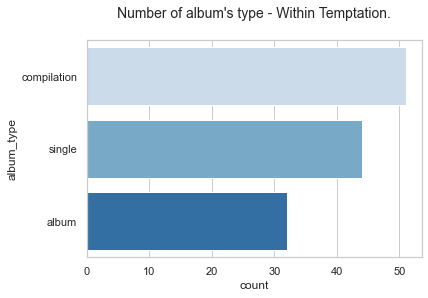

In [39]:
plt.title("Number of album's type - Within Temptation.\n", fontsize = 14)
sns.countplot(data=df_albums_within_temptation, y='album_type', palette = 'Blues', order = df_albums_within_temptation['album_type'].value_counts().index)


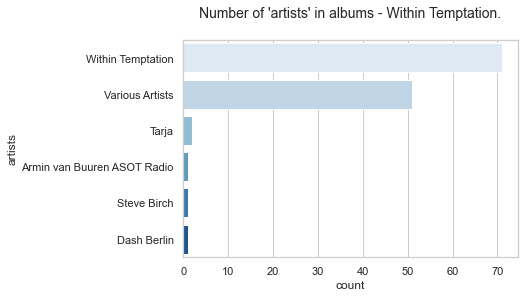

In [40]:
plt.title("Number of 'artists' in albums - Within Temptation.\n", fontsize = 14)
sns.countplot(data=df_albums_within_temptation, y='artists', palette = 'Blues', order = df_albums_within_temptation['artists'].value_counts().index)


For Within Temptation we have some more details about artists included in albums with the band. For instance, Within Temptation are in albums that have also Armin van Buuren, Tarja, Dash Berlin, and Steve Birch.

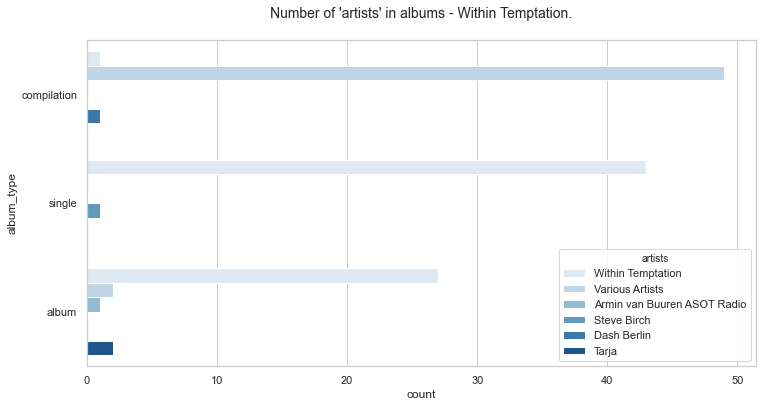

In [41]:
plt.figure(figsize=(12,6))
plt.title("Number of 'artists' in albums - Within Temptation.\n", fontsize = 14)
sns.countplot(data=df_albums_within_temptation, y='album_type', hue = 'artists', palette = 'Blues', order = df_albums_within_temptation['album_type'].value_counts().index)


We can observe that works containing exclusively `Within Temptation` can be found in all categories, however mostly it happens for `single`.

I'll filter the information retrieved about albums such that I have albums only with the band considered. 

From the plots above we can see that for `Evanescence` compilation is only when there are Various Artists. However, the same doesn't hold for `Within Temptation`. There are compilations with only `Within Temptation`. So we will check it before applying our filtering to be sure.


In [42]:
df_albums_within_temptation[(df_albums_within_temptation["album_type"]=='compilation') 
                            & (df_albums_within_temptation["artists"]=='Within Temptation')]

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
88,3eOkgpO5Nj9O8bkumoOoeP,Hydra,compilation,Within Temptation,2014,2014-04-02,https://i.scdn.co/image/ab67616d0000b273f863a1d6c7d3d2ce913ddfa7,10,US,1,spotify:album:3eOkgpO5Nj9O8bkumoOoeP


In [43]:
df_albums_within_temptation[df_albums_within_temptation["album_name"]=='Hydra']

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
81,1n8Dw55DnfiRRsbf6xWdoF,Hydra,album,Within Temptation,2014,2014-01-22,https://i.scdn.co/image/ab67616d0000b273ecd5404a8a3bc42cc794eec7,10,JP,1,spotify:album:1n8Dw55DnfiRRsbf6xWdoF
82,3OtfwvUuFoot44ObRhjHh9,Hydra,album,Within Temptation,2014,2014-01-31,https://i.scdn.co/image/ab67616d0000b273ceec03ff579e8d267a5ce16c,10,"GB,IE",2,spotify:album:3OtfwvUuFoot44ObRhjHh9
84,7lyT5jYlYXRguuyfW5b08A,Hydra,album,Within Temptation,2014,2014-02-04,https://i.scdn.co/image/ab67616d0000b2737cad5dc3a102cbe39e0e226a,10,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GR,GT,HK,HN,HU,ID,IL,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",74,spotify:album:7lyT5jYlYXRguuyfW5b08A
88,3eOkgpO5Nj9O8bkumoOoeP,Hydra,compilation,Within Temptation,2014,2014-04-02,https://i.scdn.co/image/ab67616d0000b273f863a1d6c7d3d2ce913ddfa7,10,US,1,spotify:album:3eOkgpO5Nj9O8bkumoOoeP


The album `Hydra` was classified as _compilation_ in the US. All 4 entries have 10 tracks.

## Keep only albums of the artist of interest

Therefore, our filtering will consist for both bands in keeping `album_type`: album and `artists`the band self.

The reason I'm not usually including compilations is because they usually are an ensemble of tracks of differnt artists. Singles are also not included because usually, they are included later in an album.

### Evanescence

In [44]:
df_albums_evanescence[df_albums_evanescence['artists']=='Evanescence'].sort_values('release_date', ascending=False).head(10)

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
79,2YXpMPoyWlXaghSCSyINEh,Wasted On You,single,Evanescence,2020,2020-04-24,https://i.scdn.co/image/ab67616d0000b273521518311dbb8bfabd14d0b3,1,"AD,AT,AU,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,PH,PL,PT,RO,SE,SG,SK,TH,TN,TR,TW,VN,ZA",49,spotify:album:2YXpMPoyWlXaghSCSyINEh
65,06lCOYQj86ep2FQ5E7zfJg,The Chain (From Gears 5),single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b2736f39b9a260509fba7c4dd518,1,JP,1,spotify:album:06lCOYQj86ep2FQ5E7zfJg
64,053OECifPxrpiOKbiaP5Nm,The Chain,single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b273a12a2b102df100d4b6921d23,1,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:053OECifPxrpiOKbiaP5Nm
63,1QgqZD9a32WpKpVQjmfCZO,"The Chain (From ""Gears 5"")",single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b2735f7b27dca1c3f1aa5c2a6f06,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:1QgqZD9a32WpKpVQjmfCZO
27,12NBjimNnuWAP0OXIlwyrZ,Synthesis Live,album,Evanescence,2018,2018-12-14,https://i.scdn.co/image/ab67616d0000b273d7d7b2503d4ac3964cc87a5b,16,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:12NBjimNnuWAP0OXIlwyrZ
25,30XHtkoW2UpzScXmEq34GA,Hi-Lo (feat. Lindsey Stirling) [Radio Edit],single,Evanescence,2018,2018-06-08,https://i.scdn.co/image/ab67616d0000b273e1a2c84e60b182ca208307ca,1,"AD,AT,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,ES,FI,FR,GB,GR,HU,IE,IL,IS,IT,LI,LT,LU,LV,MA,MC,MT,NL,NO,PL,PT,RO,SE,SK,TN,TR,ZA",38,spotify:album:30XHtkoW2UpzScXmEq34GA
24,2ZdOV9vcsIqhCdZsUk0xZf,Hi-Lo (feat. Lindsey Stirling),single,Evanescence,2018,2018-06-08,https://i.scdn.co/image/ab67616d0000b27399c16ee34655b1c420dbe130,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:2ZdOV9vcsIqhCdZsUk0xZf
23,3kWy3ooh6m3BPzGHfT5mte,Synthesis,album,Evanescence,2017,2017-11-10,https://i.scdn.co/image/ab67616d0000b27369c402625e586216ddd850c8,16,"AU,EG,HK,ID,IN,MY,NZ,PH,SG,TH,TW,VN",12,spotify:album:3kWy3ooh6m3BPzGHfT5mte
22,78S8Z3EOl7hbzePSH4GQyF,Synthesis,album,Evanescence,2017,2017-11-08,https://i.scdn.co/image/ab67616d0000b2734d29fad18b9ac4c0378d47d6,16,JP,1,spotify:album:78S8Z3EOl7hbzePSH4GQyF
21,2EDYZpL7Oh8EFFKHX0uvqh,Lacrymosa,single,Evanescence,2017,2017-10-27,https://i.scdn.co/image/ab67616d0000b27327332bf75bbe8e19571fe14f,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:2EDYZpL7Oh8EFFKHX0uvqh


In [45]:
df_albums_evanescence[df_albums_evanescence['artists']=='Evanescence'].shape

(21, 11)

In [46]:
df_albums_evanescence[df_albums_evanescence['artists']=='Evanescence']['album_type'].value_counts()

single    12
album     9 
Name: album_type, dtype: int64

In [47]:
df_albums_evanescence['album_type'].value_counts()

compilation    68
single         12
album          9 
Name: album_type, dtype: int64

In [48]:
df_albums_evanescence[(df_albums_evanescence['album_type']=='single')
                                                                &(df_albums_evanescence['artists']=='Evanescence')].sort_values('release_date', ascending = False)

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
79,2YXpMPoyWlXaghSCSyINEh,Wasted On You,single,Evanescence,2020,2020-04-24,https://i.scdn.co/image/ab67616d0000b273521518311dbb8bfabd14d0b3,1,"AD,AT,AU,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,PH,PL,PT,RO,SE,SG,SK,TH,TN,TR,TW,VN,ZA",49,spotify:album:2YXpMPoyWlXaghSCSyINEh
63,1QgqZD9a32WpKpVQjmfCZO,"The Chain (From ""Gears 5"")",single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b2735f7b27dca1c3f1aa5c2a6f06,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:1QgqZD9a32WpKpVQjmfCZO
64,053OECifPxrpiOKbiaP5Nm,The Chain,single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b273a12a2b102df100d4b6921d23,1,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:053OECifPxrpiOKbiaP5Nm
65,06lCOYQj86ep2FQ5E7zfJg,The Chain (From Gears 5),single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b2736f39b9a260509fba7c4dd518,1,JP,1,spotify:album:06lCOYQj86ep2FQ5E7zfJg
24,2ZdOV9vcsIqhCdZsUk0xZf,Hi-Lo (feat. Lindsey Stirling),single,Evanescence,2018,2018-06-08,https://i.scdn.co/image/ab67616d0000b27399c16ee34655b1c420dbe130,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:2ZdOV9vcsIqhCdZsUk0xZf
25,30XHtkoW2UpzScXmEq34GA,Hi-Lo (feat. Lindsey Stirling) [Radio Edit],single,Evanescence,2018,2018-06-08,https://i.scdn.co/image/ab67616d0000b273e1a2c84e60b182ca208307ca,1,"AD,AT,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,ES,FI,FR,GB,GR,HU,IE,IL,IS,IT,LI,LT,LU,LV,MA,MC,MT,NL,NO,PL,PT,RO,SE,SK,TN,TR,ZA",38,spotify:album:30XHtkoW2UpzScXmEq34GA
21,2EDYZpL7Oh8EFFKHX0uvqh,Lacrymosa,single,Evanescence,2017,2017-10-27,https://i.scdn.co/image/ab67616d0000b27327332bf75bbe8e19571fe14f,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:2EDYZpL7Oh8EFFKHX0uvqh
20,0IOH9SFPWkoggrv6T0fjO3,Imperfection,single,Evanescence,2017,2017-09-15,https://i.scdn.co/image/ab67616d0000b273d543e261efc6d73150f296cd,1,"AD,AT,AU,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,PH,PL,PT,RO,SG,SK,TH,TN,TR,TW,VN,ZA",49,spotify:album:0IOH9SFPWkoggrv6T0fjO3
19,5jZYa2Za6usEVssTFuIFY0,Bring Me To Life (Synthesis),single,Evanescence,2017,2017-09-01,https://i.scdn.co/image/ab67616d0000b2732560f59f5973739526d4302b,1,JP,1,spotify:album:5jZYa2Za6usEVssTFuIFY0
17,2R3AjTiTd31eUqwbRDQ2tY,Bring Me to Life (Synthesis),single,Evanescence,2017,2017-08-18,https://i.scdn.co/image/ab67616d0000b273e8ca35c4ab2f0dd1eb5ca2ce,1,"AD,AT,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HU,IE,IL,IS,IT,LI,LT,LU,LV,MA,MC,MT,NL,NO,PL,PT,RO,SE,SK,TN,TR,ZA",39,spotify:album:2R3AjTiTd31eUqwbRDQ2tY


As we want to include only albums with Evanescence we should consider album types `single` and `album`. To avoid repetition of track I'll keep albums in category `album` and `single` from 2019 and 2020. Because the last album release was in 2018, therefore singles released in 2019 and 2020 are still not in category album.

There is a new single from `Evanescence` but it is not yet in an album. 

I can keep the information of the last released single of Evanescence to be included after filtering.

In [49]:
df_albums_evanescence_filtered = df_albums_evanescence[((df_albums_evanescence['album_type']=='single')&(df_albums_evanescence['release_year']>=2019))
                                                      |(df_albums_evanescence['album_type']=='album')]
# reset index
df_albums_evanescence_filtered.reset_index(inplace=True, drop = True)

df_albums_evanescence_filtered

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,02w1xMzzdF2OJxTeh1basm,Fallen,album,Evanescence,2003,2003-03-04,https://i.scdn.co/image/ab67616d0000b27325f49ab23f0ec6332efef432,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:02w1xMzzdF2OJxTeh1basm
1,5SpQ4sf9sXFWHgUKYCZSDF,Anywhere But Home (Live),album,Evanescence,2004,2004-01-01,https://i.scdn.co/image/ab67616d0000b273448aba708690c87f0b043b5b,14,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5SpQ4sf9sXFWHgUKYCZSDF
2,3lFQ9ihSNR5YD0yi0yTzdC,The Open Door,album,Evanescence,2006,2006-01-01,https://i.scdn.co/image/ab67616d0000b2737b8aabae10ab5bbe7c7f11c5,13,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:3lFQ9ihSNR5YD0yi0yTzdC
3,3U85Q4GtR0I3VwgDOKHttO,Evanescence,album,Evanescence,2011,2011-01-01,https://i.scdn.co/image/ab67616d0000b273a694061dd2dead2b4b043a8d,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:3U85Q4GtR0I3VwgDOKHttO
4,0CHgu3JbE3Y0XQSejmQqLU,Evanescence (Deluxe Version),album,Evanescence,2011,2011-01-01,https://i.scdn.co/image/ab67616d0000b273d116026b6b4711886f9c80e6,16,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:0CHgu3JbE3Y0XQSejmQqLU
5,55VNOaV0zcQqGSrjOBHKVG,Lost Whispers,album,Evanescence,2016,2016-01-01,https://i.scdn.co/image/ab67616d0000b27317c58b17b0d1526c8d25a0aa,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:55VNOaV0zcQqGSrjOBHKVG
6,78S8Z3EOl7hbzePSH4GQyF,Synthesis,album,Evanescence,2017,2017-11-08,https://i.scdn.co/image/ab67616d0000b2734d29fad18b9ac4c0378d47d6,16,JP,1,spotify:album:78S8Z3EOl7hbzePSH4GQyF
7,3kWy3ooh6m3BPzGHfT5mte,Synthesis,album,Evanescence,2017,2017-11-10,https://i.scdn.co/image/ab67616d0000b27369c402625e586216ddd850c8,16,"AU,EG,HK,ID,IN,MY,NZ,PH,SG,TH,TW,VN",12,spotify:album:3kWy3ooh6m3BPzGHfT5mte
8,12NBjimNnuWAP0OXIlwyrZ,Synthesis Live,album,Evanescence,2018,2018-12-14,https://i.scdn.co/image/ab67616d0000b273d7d7b2503d4ac3964cc87a5b,16,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:12NBjimNnuWAP0OXIlwyrZ
9,1QgqZD9a32WpKpVQjmfCZO,"The Chain (From ""Gears 5"")",single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b2735f7b27dca1c3f1aa5c2a6f06,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:1QgqZD9a32WpKpVQjmfCZO


In [50]:
df_albums_evanescence.shape

(89, 11)

In [51]:
df_albums_evanescence_filtered.shape

(13, 11)

In [52]:
df_albums_evanescence_filtered.columns

Index(['album_id', 'album_name', 'album_type', 'artists', 'release_year',
       'release_date', 'cover_album', 'total_tracks', 'available_markets',
       'total_available_markets', 'album_uri'],
      dtype='object')

In [53]:
df_albums_evanescence_filtered[['album_id', 'album_name','release_date','total_tracks']].sort_values(['album_name','total_tracks'],ascending = False)

,album_id,album_name,release_date,total_tracks
12,2YXpMPoyWlXaghSCSyINEh,Wasted On You,2020-04-24,1
2,3lFQ9ihSNR5YD0yi0yTzdC,The Open Door,2006-01-01,13
11,06lCOYQj86ep2FQ5E7zfJg,The Chain (From Gears 5),2019-11-22,1
9,1QgqZD9a32WpKpVQjmfCZO,"The Chain (From ""Gears 5"")",2019-11-22,1
10,053OECifPxrpiOKbiaP5Nm,The Chain,2019-11-22,1
8,12NBjimNnuWAP0OXIlwyrZ,Synthesis Live,2018-12-14,16
6,78S8Z3EOl7hbzePSH4GQyF,Synthesis,2017-11-08,16
7,3kWy3ooh6m3BPzGHfT5mte,Synthesis,2017-11-10,16
5,55VNOaV0zcQqGSrjOBHKVG,Lost Whispers,2016-01-01,12
0,02w1xMzzdF2OJxTeh1basm,Fallen,2003-03-04,12


Initially, we retrieved 89 albums. After, filtering we kept 13 albums which are not `compilation` and do not include singles before 2019 since these must be already in category `album`. 

Notice that are apparently some repeated entries. For instances, album `Evanescence` have two versions where the Deluxe version has more tracks. On the other side, album `Synthesis` has also two versions (studio and Live). However, they have the same number of tracks. There is also another entry for `Synthesis` for the studio version with a different release date. Apparently, in Japan this album was released 2 days after the other countries. Because album `Synthesis` seems to differ only on the release date we will apply another filtering to eliminate this case. 

I'll remove albums with same title and same number of lyrics, and if there is different versions I'll keep the ones with more tracks.

In [54]:
df_albums_evanescence_filtered.drop_duplicates(subset=['album_name'], keep='first', inplace = True)
df_albums_evanescence_filtered

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,02w1xMzzdF2OJxTeh1basm,Fallen,album,Evanescence,2003,2003-03-04,https://i.scdn.co/image/ab67616d0000b27325f49ab23f0ec6332efef432,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:02w1xMzzdF2OJxTeh1basm
1,5SpQ4sf9sXFWHgUKYCZSDF,Anywhere But Home (Live),album,Evanescence,2004,2004-01-01,https://i.scdn.co/image/ab67616d0000b273448aba708690c87f0b043b5b,14,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5SpQ4sf9sXFWHgUKYCZSDF
2,3lFQ9ihSNR5YD0yi0yTzdC,The Open Door,album,Evanescence,2006,2006-01-01,https://i.scdn.co/image/ab67616d0000b2737b8aabae10ab5bbe7c7f11c5,13,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:3lFQ9ihSNR5YD0yi0yTzdC
3,3U85Q4GtR0I3VwgDOKHttO,Evanescence,album,Evanescence,2011,2011-01-01,https://i.scdn.co/image/ab67616d0000b273a694061dd2dead2b4b043a8d,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:3U85Q4GtR0I3VwgDOKHttO
4,0CHgu3JbE3Y0XQSejmQqLU,Evanescence (Deluxe Version),album,Evanescence,2011,2011-01-01,https://i.scdn.co/image/ab67616d0000b273d116026b6b4711886f9c80e6,16,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:0CHgu3JbE3Y0XQSejmQqLU
5,55VNOaV0zcQqGSrjOBHKVG,Lost Whispers,album,Evanescence,2016,2016-01-01,https://i.scdn.co/image/ab67616d0000b27317c58b17b0d1526c8d25a0aa,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:55VNOaV0zcQqGSrjOBHKVG
6,78S8Z3EOl7hbzePSH4GQyF,Synthesis,album,Evanescence,2017,2017-11-08,https://i.scdn.co/image/ab67616d0000b2734d29fad18b9ac4c0378d47d6,16,JP,1,spotify:album:78S8Z3EOl7hbzePSH4GQyF
8,12NBjimNnuWAP0OXIlwyrZ,Synthesis Live,album,Evanescence,2018,2018-12-14,https://i.scdn.co/image/ab67616d0000b273d7d7b2503d4ac3964cc87a5b,16,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:12NBjimNnuWAP0OXIlwyrZ
9,1QgqZD9a32WpKpVQjmfCZO,"The Chain (From ""Gears 5"")",single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b2735f7b27dca1c3f1aa5c2a6f06,1,"AR,BO,BR,CA,CL,CO,CR,DO,EC,GT,HN,MX,NI,PA,PE,PY,SV,US,UY",19,spotify:album:1QgqZD9a32WpKpVQjmfCZO
10,053OECifPxrpiOKbiaP5Nm,The Chain,single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b273a12a2b102df100d4b6921d23,1,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:053OECifPxrpiOKbiaP5Nm


In [55]:
df_albums_evanescence_filtered['album_name'].tolist()

['Fallen',
 'Anywhere But Home (Live)',
 'The Open Door',
 'Evanescence',
 'Evanescence (Deluxe Version)',
 'Lost Whispers',
 'Synthesis',
 'Synthesis Live',
 'The Chain (From "Gears 5")',
 'The Chain',
 'The Chain (From Gears 5)',
 'Wasted On You']

In [56]:
to_keep = ['Fallen',
 'Anywhere But Home (Live)',
 'The Open Door',
 'Evanescence (Deluxe Version)',
 'Lost Whispers',
 'Synthesis',
 'The Chain',
 'Wasted On You']

In [57]:
df_albums_evanescence_filtered[df_albums_evanescence_filtered['album_name'].isin(to_keep)]

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,02w1xMzzdF2OJxTeh1basm,Fallen,album,Evanescence,2003,2003-03-04,https://i.scdn.co/image/ab67616d0000b27325f49ab23f0ec6332efef432,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:02w1xMzzdF2OJxTeh1basm
1,5SpQ4sf9sXFWHgUKYCZSDF,Anywhere But Home (Live),album,Evanescence,2004,2004-01-01,https://i.scdn.co/image/ab67616d0000b273448aba708690c87f0b043b5b,14,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5SpQ4sf9sXFWHgUKYCZSDF
2,3lFQ9ihSNR5YD0yi0yTzdC,The Open Door,album,Evanescence,2006,2006-01-01,https://i.scdn.co/image/ab67616d0000b2737b8aabae10ab5bbe7c7f11c5,13,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:3lFQ9ihSNR5YD0yi0yTzdC
4,0CHgu3JbE3Y0XQSejmQqLU,Evanescence (Deluxe Version),album,Evanescence,2011,2011-01-01,https://i.scdn.co/image/ab67616d0000b273d116026b6b4711886f9c80e6,16,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:0CHgu3JbE3Y0XQSejmQqLU
5,55VNOaV0zcQqGSrjOBHKVG,Lost Whispers,album,Evanescence,2016,2016-01-01,https://i.scdn.co/image/ab67616d0000b27317c58b17b0d1526c8d25a0aa,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:55VNOaV0zcQqGSrjOBHKVG
6,78S8Z3EOl7hbzePSH4GQyF,Synthesis,album,Evanescence,2017,2017-11-08,https://i.scdn.co/image/ab67616d0000b2734d29fad18b9ac4c0378d47d6,16,JP,1,spotify:album:78S8Z3EOl7hbzePSH4GQyF
10,053OECifPxrpiOKbiaP5Nm,The Chain,single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b273a12a2b102df100d4b6921d23,1,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:053OECifPxrpiOKbiaP5Nm
12,2YXpMPoyWlXaghSCSyINEh,Wasted On You,single,Evanescence,2020,2020-04-24,https://i.scdn.co/image/ab67616d0000b273521518311dbb8bfabd14d0b3,1,"AD,AT,AU,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,PH,PL,PT,RO,SE,SG,SK,TH,TN,TR,TW,VN,ZA",49,spotify:album:2YXpMPoyWlXaghSCSyINEh


In [58]:
df_albums_evanescence_filtered = df_albums_evanescence_filtered[df_albums_evanescence_filtered['album_name'].isin(to_keep)]
df_albums_evanescence_filtered.sort_values(by='release_year', ascending = False,inplace = True)
df_albums_evanescence_filtered.reset_index(inplace=True, drop=True)
df_albums_evanescence_filtered

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,2YXpMPoyWlXaghSCSyINEh,Wasted On You,single,Evanescence,2020,2020-04-24,https://i.scdn.co/image/ab67616d0000b273521518311dbb8bfabd14d0b3,1,"AD,AT,AU,BE,BG,CH,CY,CZ,DE,DK,DZ,EE,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,PH,PL,PT,RO,SE,SG,SK,TH,TN,TR,TW,VN,ZA",49,spotify:album:2YXpMPoyWlXaghSCSyINEh
1,053OECifPxrpiOKbiaP5Nm,The Chain,single,Evanescence,2019,2019-11-22,https://i.scdn.co/image/ab67616d0000b273a12a2b102df100d4b6921d23,1,"AD,AE,AT,AU,BE,BG,BH,CH,CY,CZ,DE,DK,DZ,EE,EG,ES,FI,FR,GB,GR,HK,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MY,NL,NO,NZ,OM,PH,PL,PT,QA,RO,SA,SE,SG,SK,TH,TN,TR,TW,VN,ZA",58,spotify:album:053OECifPxrpiOKbiaP5Nm
2,78S8Z3EOl7hbzePSH4GQyF,Synthesis,album,Evanescence,2017,2017-11-08,https://i.scdn.co/image/ab67616d0000b2734d29fad18b9ac4c0378d47d6,16,JP,1,spotify:album:78S8Z3EOl7hbzePSH4GQyF
3,55VNOaV0zcQqGSrjOBHKVG,Lost Whispers,album,Evanescence,2016,2016-01-01,https://i.scdn.co/image/ab67616d0000b27317c58b17b0d1526c8d25a0aa,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:55VNOaV0zcQqGSrjOBHKVG
4,0CHgu3JbE3Y0XQSejmQqLU,Evanescence (Deluxe Version),album,Evanescence,2011,2011-01-01,https://i.scdn.co/image/ab67616d0000b273d116026b6b4711886f9c80e6,16,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:0CHgu3JbE3Y0XQSejmQqLU
5,3lFQ9ihSNR5YD0yi0yTzdC,The Open Door,album,Evanescence,2006,2006-01-01,https://i.scdn.co/image/ab67616d0000b2737b8aabae10ab5bbe7c7f11c5,13,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:3lFQ9ihSNR5YD0yi0yTzdC
6,5SpQ4sf9sXFWHgUKYCZSDF,Anywhere But Home (Live),album,Evanescence,2004,2004-01-01,https://i.scdn.co/image/ab67616d0000b273448aba708690c87f0b043b5b,14,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5SpQ4sf9sXFWHgUKYCZSDF
7,02w1xMzzdF2OJxTeh1basm,Fallen,album,Evanescence,2003,2003-03-04,https://i.scdn.co/image/ab67616d0000b27325f49ab23f0ec6332efef432,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:02w1xMzzdF2OJxTeh1basm


Just confirmed in the [official site of Evanescence](http://www.evanescence.com/music/) that the albums retrieved are the ones listed in the dataframe above (not Live of Deluxe version).

In [59]:
df_albums_evanescence_filtered['total_tracks'].sum()

85

### Within Temptation

In [60]:
df_albums_within_temptation[df_albums_within_temptation['artists']=='Within Temptation'].sort_values('release_year', ascending = False).head(10)

,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
126,5fE1zz1xFy9wRLmruEo9A3,Entertain You,single,Within Temptation,2020,2020-05-08,https://i.scdn.co/image/ab67616d0000b27338256ec6ec7c0e9cd3bf3e92,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5fE1zz1xFy9wRLmruEo9A3
122,2nGgpfe9684ekh5Vinn1kZ,RESIST,album,Within Temptation,2019,2019-02-01,https://i.scdn.co/image/ab67616d0000b273c4640fc8378887186c4cfbc7,10,JP,1,spotify:album:2nGgpfe9684ekh5Vinn1kZ
121,1SL2IdaCrXDtv695Px6AXR,Resist (Extended Deluxe),album,Within Temptation,2019,2019-02-01,https://i.scdn.co/image/ab67616d0000b27374615e79e3ec1228d8697e21,25,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",78,spotify:album:1SL2IdaCrXDtv695Px6AXR
120,7rgEimjY2VTIYtxN9pV7Pm,In Vain,single,Within Temptation,2019,2019-01-13,https://i.scdn.co/image/ab67616d0000b2738070f38af2a7ebd77d169600,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",76,spotify:album:7rgEimjY2VTIYtxN9pV7Pm
119,5rZtYuq7Rr6PvwI94p8FVR,In Vain,single,Within Temptation,2019,2019-01-11,https://i.scdn.co/image/ab67616d0000b273a1e7facee7c14df72572e8fe,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",78,spotify:album:5rZtYuq7Rr6PvwI94p8FVR
118,1SJtMZbCczNb0ojU8YjiSr,Firelight,single,Within Temptation,2018,2018-11-23,https://i.scdn.co/image/ab67616d0000b273668f1aa941d73b5c882bab7f,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",78,spotify:album:1SJtMZbCczNb0ojU8YjiSr
117,1U4BqhNdRoQqAKqXvKiIFM,Raise Your Banner,single,Within Temptation,2018,2018-11-16,https://i.scdn.co/image/ab67616d0000b2732626cd225a1fd73e9093bc26,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",78,spotify:album:1U4BqhNdRoQqAKqXvKiIFM
115,0cytKiK9q4sazRfuiIvuCX,THE RECKONING,single,Within Temptation,2018,2018-09-26,https://i.scdn.co/image/ab67616d0000b27309900b6c84509e8f9d9acb95,1,JP,1,spotify:album:0cytKiK9q4sazRfuiIvuCX
114,2UAqWPHRSXHBHkCxsL3oMj,The Reckoning,single,Within Temptation,2018,2018-09-14,https://i.scdn.co/image/ab67616d0000b273b93e74ecb6a2e7763c4c507e,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",78,spotify:album:2UAqWPHRSXHBHkCxsL3oMj
100,5qPRnG1MWAr63LE6UgwpDj,And We Run (feat. Xzibit) [Whole World Band Edition],single,Within Temptation,2015,2015-01-01,https://i.scdn.co/image/ab67616d0000b27312dadaad5d1decfb3a543fcb,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GR,GT,HK,HN,HU,ID,IL,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",74,spotify:album:5qPRnG1MWAr63LE6UgwpDj


There is one new single this year that is not included in album.

In [61]:
df_albums_within_temptation_filtered = df_albums_within_temptation[((df_albums_within_temptation['album_type']=='single')&(df_albums_within_temptation['release_year']>2019))
                                                      |((df_albums_within_temptation['album_type']=='album')&(df_albums_within_temptation['artists']=='Within Temptation'))]

df_albums_within_temptation_filtered.sort_values('release_date',ascending=False, inplace=True)

# reset index
df_albums_within_temptation_filtered.reset_index(inplace=True, drop = True)

df_albums_within_temptation_filtered

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,5fE1zz1xFy9wRLmruEo9A3,Entertain You,single,Within Temptation,2020,2020-05-08,https://i.scdn.co/image/ab67616d0000b27338256ec6ec7c0e9cd3bf3e92,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5fE1zz1xFy9wRLmruEo9A3
1,2nGgpfe9684ekh5Vinn1kZ,RESIST,album,Within Temptation,2019,2019-02-01,https://i.scdn.co/image/ab67616d0000b273c4640fc8378887186c4cfbc7,10,JP,1,spotify:album:2nGgpfe9684ekh5Vinn1kZ
2,1SL2IdaCrXDtv695Px6AXR,Resist (Extended Deluxe),album,Within Temptation,2019,2019-02-01,https://i.scdn.co/image/ab67616d0000b27374615e79e3ec1228d8697e21,25,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",78,spotify:album:1SL2IdaCrXDtv695Px6AXR
3,448wLlFJO42jAikj7C79vB,Let Us Burn: Elements & Hydra Live in Concert,album,Within Temptation,2014,2014-11-17,https://i.scdn.co/image/ab67616d0000b27360af81bb3d4e9ff0772c210a,32,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GR,GT,HK,HN,HU,ID,IL,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",74,spotify:album:448wLlFJO42jAikj7C79vB
4,6IVZq57sAh1DswbUw4IMB6,Let Us Burn (Elements & Hydra Live In Concert),album,Within Temptation,2014,2014-11-17,https://i.scdn.co/image/dd7ee328abce3e05f7cd219053ae6bc38573f597,32,"HK,MY,SG,TW",4,spotify:album:6IVZq57sAh1DswbUw4IMB6
5,6RhRz5iivNjN251Cb52kKq,Let Us Burn (Elements & Hydra Live in Concert),album,Within Temptation,2014,2014-11-14,https://i.scdn.co/image/ab67616d0000b273ad12de26c446665df8541554,32,"GB,IE",2,spotify:album:6RhRz5iivNjN251Cb52kKq
6,4aKG85KZLoC70n17dlvOlq,Let Us Burn - Elements & Hydra Live In Concert,album,Within Temptation,2014,2014-11-12,https://i.scdn.co/image/ab67616d0000b273e094696b4c478f9819200354,32,JP,1,spotify:album:4aKG85KZLoC70n17dlvOlq
7,5zMAgwltwzSBFGi6bK7sAU,Let Us Burn (Elements & Hydra Live in Concert),album,Within Temptation,2014,2014-10-11,https://i.scdn.co/image/ab67616d0000b273e125cdc51cb73186de987fda,32,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5zMAgwltwzSBFGi6bK7sAU
8,0hbFubqseR3NFJLSRKNTnt,Enter + The Dance,album,Within Temptation,2014,2014-10-11,https://i.scdn.co/image/ab67616d0000b27352b5f691ade915ed27ba8f75,13,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:0hbFubqseR3NFJLSRKNTnt
9,3YqT2htKc9ayYPmP1bGITO,Hydra (Deluxe Edition),album,Within Temptation,2014,2014-02-04,https://i.scdn.co/image/ab67616d0000b273c337ca37478fbb28ad302e7b,18,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GR,GT,HK,HN,HU,ID,IL,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",74,spotify:album:3YqT2htKc9ayYPmP1bGITO


In [62]:
df_albums_within_temptation.shape

(127, 11)

In [63]:
df_albums_within_temptation_filtered.shape

(28, 11)

Initially, we retrieved 127 albums. After, filtering we kept 28 albums which are of type `album` and one `single` from 2020. Notice that there many repeated `album_name` entries. We can for instances observe different release dates depending on the country. Sometimes, there are different versions, e.g. `An Acoustic Night at the Theatre (Live)` and `An Acoustic Night at the Theatre`. 

The discography of Within Temptation is also well represented as checked in [Wikipedia](https://en.wikipedia.org/wiki/Within_Temptation_discography) (the official website does not provide information about discography).

Ignoring the special editions (e.g. Live, Special Edition) there would be 10 albums within our criteria (only albums, no compilations). The album `Q-Music Sessions` is pointed in wikipedia as a compilation only released in The Netherlands and Belgium).

I'll remove for now duplicates based on `album_name` and `total_tracks`. Like this I'll be keeping probably the original album and removing duplicates which have the same number of tracks.

In [64]:
df_albums_within_temptation_filtered.drop_duplicates(subset=['album_name','total_tracks'], keep='first', inplace = True)

df_albums_within_temptation_filtered.reset_index(inplace=True, drop=True)
df_albums_within_temptation_filtered

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,album_id,album_name,album_type,artists,release_year,release_date,cover_album,total_tracks,available_markets,total_available_markets,album_uri
0,5fE1zz1xFy9wRLmruEo9A3,Entertain You,single,Within Temptation,2020,2020-05-08,https://i.scdn.co/image/ab67616d0000b27338256ec6ec7c0e9cd3bf3e92,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:5fE1zz1xFy9wRLmruEo9A3
1,2nGgpfe9684ekh5Vinn1kZ,RESIST,album,Within Temptation,2019,2019-02-01,https://i.scdn.co/image/ab67616d0000b273c4640fc8378887186c4cfbc7,10,JP,1,spotify:album:2nGgpfe9684ekh5Vinn1kZ
2,1SL2IdaCrXDtv695Px6AXR,Resist (Extended Deluxe),album,Within Temptation,2019,2019-02-01,https://i.scdn.co/image/ab67616d0000b27374615e79e3ec1228d8697e21,25,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",78,spotify:album:1SL2IdaCrXDtv695Px6AXR
3,448wLlFJO42jAikj7C79vB,Let Us Burn: Elements & Hydra Live in Concert,album,Within Temptation,2014,2014-11-17,https://i.scdn.co/image/ab67616d0000b27360af81bb3d4e9ff0772c210a,32,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GR,GT,HK,HN,HU,ID,IL,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",74,spotify:album:448wLlFJO42jAikj7C79vB
4,6IVZq57sAh1DswbUw4IMB6,Let Us Burn (Elements & Hydra Live In Concert),album,Within Temptation,2014,2014-11-17,https://i.scdn.co/image/dd7ee328abce3e05f7cd219053ae6bc38573f597,32,"HK,MY,SG,TW",4,spotify:album:6IVZq57sAh1DswbUw4IMB6
5,6RhRz5iivNjN251Cb52kKq,Let Us Burn (Elements & Hydra Live in Concert),album,Within Temptation,2014,2014-11-14,https://i.scdn.co/image/ab67616d0000b273ad12de26c446665df8541554,32,"GB,IE",2,spotify:album:6RhRz5iivNjN251Cb52kKq
6,4aKG85KZLoC70n17dlvOlq,Let Us Burn - Elements & Hydra Live In Concert,album,Within Temptation,2014,2014-11-12,https://i.scdn.co/image/ab67616d0000b273e094696b4c478f9819200354,32,JP,1,spotify:album:4aKG85KZLoC70n17dlvOlq
7,0hbFubqseR3NFJLSRKNTnt,Enter + The Dance,album,Within Temptation,2014,2014-10-11,https://i.scdn.co/image/ab67616d0000b27352b5f691ade915ed27ba8f75,13,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,US,UY,VN,ZA",79,spotify:album:0hbFubqseR3NFJLSRKNTnt
8,3YqT2htKc9ayYPmP1bGITO,Hydra (Deluxe Edition),album,Within Temptation,2014,2014-02-04,https://i.scdn.co/image/ab67616d0000b273c337ca37478fbb28ad302e7b,18,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GR,GT,HK,HN,HU,ID,IL,IS,IT,JO,KW,LB,LI,LT,LU,LV,MA,MC,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,SA,SE,SG,SK,SV,TH,TN,TR,TW,UY,VN,ZA",74,spotify:album:3YqT2htKc9ayYPmP1bGITO
9,6nnX6KBteT87aawt2wsw76,Hydra (Special Edition),album,Within Temptation,2014,2014-02-04,https://i.scdn.co/image/ab67616d0000b273398f6e00f13327ccf9206cbf,18,US,1,spotify:album:6nnX6KBteT87aawt2wsw76


In [65]:
df_albums_within_temptation_filtered[['album_name','release_year','total_tracks']]

,album_name,release_year,total_tracks
0,Entertain You,2020,1
1,RESIST,2019,10
2,Resist (Extended Deluxe),2019,25
3,Let Us Burn: Elements & Hydra Live in Concert,2014,32
4,Let Us Burn (Elements & Hydra Live In Concert),2014,32
5,Let Us Burn (Elements & Hydra Live in Concert),2014,32
6,Let Us Burn - Elements & Hydra Live In Concert,2014,32
7,Enter + The Dance,2014,13
8,Hydra (Deluxe Edition),2014,18
9,Hydra (Special Edition),2014,18


We still have some albums with 'same' title. Some with same number of tracks but slightly different spelling and other with same speling but different number of tracks.

Most of the differences pointed come probably from the markets where the album a released. 

My choice is to have the most number of lyrics, try to avoid losing information so I'll keep albums with similar name and more tracks. I'll do this by selecting indexes in the dataframe.

In [66]:
selected_to_drop_indexes = [1,3,4,5,9,10,12,14,18,19]

In [67]:
# Making titles more uniform before another drop duplicates

df_albums_within_temptation_filtered.drop(selected_to_drop_indexes, inplace = True)
df_albums_within_temptation_filtered.reset_index(inplace=True, drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
df_albums_within_temptation_filtered[['album_name','release_year','total_tracks']].sort_values(by='release_year')

,album_name,release_year,total_tracks
12,Enter,1997,8
11,Mother Earth,2003,14
10,The Silent Force,2004,13
9,The Heart Of Everything,2007,16
8,Black Symphony,2008,23
7,An Acoustic Night At The Theatre,2009,13
6,The Unforgiving,2011,13
5,The Q-Music Sessions,2013,11
2,Let Us Burn - Elements & Hydra Live In Concert,2014,32
3,Enter + The Dance,2014,13


In [69]:
df_albums_within_temptation_filtered.shape

(13, 11)

`Enter + The Dance` seem to have tracks of `Enter` and [`The Dance`](https://en.wikipedia.org/wiki/The_Dance_(EP)). Since we don't have `The Dance` alone I'll keep this one. Repeated tracks can be eliminated when working with tracks information.

# **Retrieving tracks information**

Using album_id's just retrieved we will retrieve information about tracks, including both metadata and audio features.

In [70]:
def retrieve_tracks_info(album_id):
    """ 
    Retrieve info of tracks in an album
    """
    
    album_name = []
    album_release_date = []
    track_id = []
    track_name = []
    track_duration = []
    track_popularity = []
    track_preview = [] 
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    
    tracks_info = sp.album_tracks(album_id)
    
    for idx in range(len(tracks_info['items'])):
        t_id = tracks_info['items'][idx]['id']
        track_metadata=sp.track(t_id)
        album_name.append(track_metadata['album']['name'])
        album_release_date.append(track_metadata['album']['release_date'])
        track_id.append(track_metadata['id'])
        track_name.append(track_metadata['name'])
        track_duration.append(track_metadata['duration_ms'])
        track_popularity.append(track_metadata['popularity'])
        track_preview.append(track_metadata['preview_url'])
        
        
    # obtain audio features of a track
    
    for idx in range(len(track_id)):
        audio_features = sp.audio_features(track_id)[idx]
        danceability.append(audio_features['danceability'])
        energy.append(audio_features['energy'])
        key.append(audio_features['key'])
        loudness.append(audio_features['loudness'])
        mode.append(audio_features['mode'])
        speechiness.append(audio_features['speechiness'])
        acousticness.append(audio_features['acousticness'])
        instrumentalness.append(audio_features['instrumentalness'])
        liveness.append(audio_features['liveness'])
        valence.append(audio_features['valence'])
        tempo.append(audio_features['tempo'])
        
        
        
    dict_tracks = {'album_name':album_name,
                   'album_release_date':album_release_date,
                  'track_id':track_id,
                  'track_name':track_name,
                  'track_duration':track_duration,
                  'track_popularity':track_popularity,
                  'track_preview':track_preview,
                  'danceability': danceability,
                   'energy': energy,
                   'key': key,
                   'loudness': loudness,
                   'mode': mode,
                   'speechiness': speechiness,
                   'acousticness': acousticness,
                   'instrumentalness': instrumentalness,
                   'liveness': liveness,
                   'valence': valence,
                   'tempo': tempo}
    
    df_tracks_info = pd.DataFrame(dict_tracks)
    
    # Create year column
    
    df_tracks_info['album_release_date'] = pd.to_datetime(df_tracks_info['album_release_date'],  format='%Y-%m-%d')
    
    df_tracks_info['album_release_year'] = df_tracks_info['album_release_date'].apply(lambda x: x.year)
    
    # ordering
    
    df_tracks_info = df_tracks_info[['album_name','album_release_date', 'album_release_year','track_id','track_name',
                                     'track_duration','track_popularity','track_preview','danceability','energy','key',
                                     'loudness', 'mode','speechiness','acousticness','instrumentalness','liveness',
                                     'valence','tempo']]
    
    return df_tracks_info

## Retrieving for a single album

### Evanescence

In [71]:
df_tracks_info = retrieve_tracks_info(df_albums_evanescence_filtered['album_id'][0])
df_tracks_info

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Wasted On You,2020-04-24,2020,7ui6fTzMeE6JCr0GWvc14n,Wasted On You,262499,59,https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c,0.326,0.539,10,-6.862,0,0.0399,0.00096,0.00223,0.0644,0.217,185.731


### Within Temptation

In [72]:
df_tracks_info = retrieve_tracks_info(df_albums_within_temptation_filtered['album_id'][0])
df_tracks_info

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Entertain You,2020-05-08,2020,70HVKogWbgiA4XaXa2GowH,Entertain You,211045,61,https://p.scdn.co/mp3-preview/3bb74739f51b566347077a64e58688787fd87111?cid=63a77ff40e794a12ae216a18befde98c,0.559,0.878,1,-4.341,0,0.0403,0.000471,0.000002,0.218,0.597,137.114


# **Retrieving tracks information for all albums from both bands**

In [73]:
def retrieve_info_tracks_list_albums(list_album_id, file_name, remove_duplicate=1):
    """ 
    Retrieve info (metadata and audio features) of tracks of a list of albums
    
    Input:
        list_album_id: List of Spotify's album's id
        file_name: name of the resulting csv file
        remove_duplicates: Remove duplicates of lyrics if remove_duplicate = 1, don't remove if remove_duplicate = 0
    """
    
    # retrieving metadata and audio features info
    df = [retrieve_tracks_info(album_id) for album_id in list_album_id]
    
    # puting information of all albums in one dataframe
    df_conc = pd.concat(df)
    
    # applying the same transformation on track name column that was applied in notebook 1 when retrieving lyrics
    
    df_conc['track_name'] = df_conc['track_name'].apply(lambda x: x.replace('-',' ').lower())
    
    if remove_duplicate == 1:
          
        # droping duplicates of tracks with same title
    
        df_conc.drop_duplicates(subset = ['track_name'],keep = 'first', inplace=True)
    
        # reset index
    
        df_conc.reset_index(drop=True,inplace = True)
    elif remove_duplicate == 0:
        pass
    else:
        print("Invalid value. Choose 1 to remove duplicate or 0 to keep duplicates.")
    # save .csv
    
    df_conc.to_csv("./data/"+file_name+"_"+TodaysDate+".csv", index = False)
    
    return df_conc

## Information tracks - Evanescence

In [74]:
list_album_id = df_albums_evanescence_filtered['album_id'].tolist()
df_tracks_evanescence_no_duplicates = retrieve_info_tracks_list_albums(list_album_id, "info_tracks_evanescence_without_duplicates")

retrying ...4secs


In [75]:
df_tracks_evanescence_no_duplicates.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Wasted On You,2020-04-24,2020,7ui6fTzMeE6JCr0GWvc14n,wasted on you,262499,59,https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c,0.326,0.539,10,-6.862,0,0.0399,0.00096,0.002230,0.0644,0.2170,185.731
1,The Chain,2019-11-22,2019,5F29kjOr9bYTUtSPLoixHB,the chain,252066,46,https://p.scdn.co/mp3-preview/96cb324c53460226c89a9f9a8631ffcd1621465b?cid=63a77ff40e794a12ae216a18befde98c,0.455,0.809,9,-5.845,1,0.0521,0.00286,0.000296,0.0998,0.2370,76.036
2,Synthesis,2017-11-08,2017,3nK9XoQh7wR3iOaWfMLXAr,overture,57560,9,None,0.149,0.056,9,-20.266,1,0.0453,0.96300,0.745000,0.1080,0.0343,96.103
3,Synthesis,2017-11-08,2017,23M0gC4uZGwVhbWsHdtdyY,never go back,290546,11,None,0.292,0.589,4,-5.541,0,0.0432,0.59300,0.000696,0.1640,0.0555,124.749
4,Synthesis,2017-11-08,2017,4HDd1hurlRFK7Mz1BCnv1f,hi lo,307720,12,None,0.447,0.607,3,-6.533,0,0.0314,0.75000,0.000278,0.1060,0.2580,92.895


In [76]:
df_tracks_evanescence_no_duplicates['track_preview'].value_counts()

https://p.scdn.co/mp3-preview/96cb324c53460226c89a9f9a8631ffcd1621465b?cid=63a77ff40e794a12ae216a18befde98c    1
https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c    1
Name: track_preview, dtype: int64

In [77]:
df_tracks_evanescence_no_duplicates.shape

(70, 19)

In [78]:
df_tracks_evanescence = retrieve_info_tracks_list_albums(list_album_id, "info_tracks_evanescence_with_duplicates", remove_duplicate=0)

retrying ...5secs
retrying ...6secs


In [79]:
df_tracks_evanescence.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Wasted On You,2020-04-24,2020,7ui6fTzMeE6JCr0GWvc14n,wasted on you,262499,59,https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c,0.326,0.539,10,-6.862,0,0.0399,0.00096,0.002230,0.0644,0.2170,185.731
0,The Chain,2019-11-22,2019,5F29kjOr9bYTUtSPLoixHB,the chain,252066,46,https://p.scdn.co/mp3-preview/96cb324c53460226c89a9f9a8631ffcd1621465b?cid=63a77ff40e794a12ae216a18befde98c,0.455,0.809,9,-5.845,1,0.0521,0.00286,0.000296,0.0998,0.2370,76.036
0,Synthesis,2017-11-08,2017,3nK9XoQh7wR3iOaWfMLXAr,overture,57560,9,None,0.149,0.056,9,-20.266,1,0.0453,0.96300,0.745000,0.1080,0.0343,96.103
1,Synthesis,2017-11-08,2017,23M0gC4uZGwVhbWsHdtdyY,never go back,290546,11,None,0.292,0.589,4,-5.541,0,0.0432,0.59300,0.000696,0.1640,0.0555,124.749
2,Synthesis,2017-11-08,2017,4HDd1hurlRFK7Mz1BCnv1f,hi lo,307720,12,None,0.447,0.607,3,-6.533,0,0.0314,0.75000,0.000278,0.1060,0.2580,92.895


In [80]:
df_tracks_evanescence.shape

(85, 19)

In [81]:
df_tracks_evanescence['track_preview'].value_counts()

https://p.scdn.co/mp3-preview/96cb324c53460226c89a9f9a8631ffcd1621465b?cid=63a77ff40e794a12ae216a18befde98c    1
https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c    1
Name: track_preview, dtype: int64

## Information tracks - Within Temptation

In [82]:
list_album_id = df_albums_within_temptation_filtered['album_id'].tolist()
df_tracks_within_temptation_no_duplicates = retrieve_info_tracks_list_albums(list_album_id, "info_tracks_within_temptation_without_duplicates")

retrying ...6secs
retrying ...6secs
retrying ...6secs
retrying ...6secs


In [83]:
df_tracks_within_temptation_no_duplicates.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Entertain You,2020-05-08,2020,70HVKogWbgiA4XaXa2GowH,entertain you,211045,61,https://p.scdn.co/mp3-preview/3bb74739f51b566347077a64e58688787fd87111?cid=63a77ff40e794a12ae216a18befde98c,0.559,0.878,1,-4.341,0,0.0403,0.000471,0.000002,0.218,0.597,137.114
1,Resist (Extended Deluxe),2019-02-01,2019,6XnPopwCZ6odHVVqMsllL5,the reckoning,251106,57,None,0.310,0.825,1,-4.530,1,0.0563,0.003560,0.000000,0.641,0.475,89.885
2,Resist (Extended Deluxe),2019-02-01,2019,5uDWqYSiWqWTXK9CbAKIA8,endless war,249360,51,None,0.452,0.865,3,-4.502,0,0.0511,0.002120,0.000000,0.281,0.260,144.988
3,Resist (Extended Deluxe),2019-02-01,2019,0lNhWQBiA483reJSVovSWF,raise your banner,334360,50,None,0.383,0.889,1,-6.784,1,0.0986,0.000269,0.000491,0.104,0.322,173.983
4,Resist (Extended Deluxe),2019-02-01,2019,4GBbBy05LoSveNxjKxj26m,supernova,336080,53,None,0.203,0.928,4,-4.838,0,0.0823,0.003270,0.000000,0.355,0.410,95.298


In [84]:
df_tracks_within_temptation_no_duplicates.shape

(166, 19)

In [85]:
df_tracks_within_temptation = retrieve_info_tracks_list_albums(list_album_id, "info_tracks_within_temptation_with_duplicates", remove_duplicate=0)

retrying ...5secs
retrying ...4secs
retrying ...6secs


In [86]:
df_tracks_within_temptation.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Entertain You,2020-05-08,2020,70HVKogWbgiA4XaXa2GowH,entertain you,211045,61,https://p.scdn.co/mp3-preview/3bb74739f51b566347077a64e58688787fd87111?cid=63a77ff40e794a12ae216a18befde98c,0.559,0.878,1,-4.341,0,0.0403,0.000471,0.000002,0.218,0.597,137.114
0,Resist (Extended Deluxe),2019-02-01,2019,6XnPopwCZ6odHVVqMsllL5,the reckoning,251106,57,None,0.310,0.825,1,-4.530,1,0.0563,0.003560,0.000000,0.641,0.475,89.885
1,Resist (Extended Deluxe),2019-02-01,2019,5uDWqYSiWqWTXK9CbAKIA8,endless war,249360,51,None,0.452,0.865,3,-4.502,0,0.0511,0.002120,0.000000,0.281,0.260,144.988
2,Resist (Extended Deluxe),2019-02-01,2019,0lNhWQBiA483reJSVovSWF,raise your banner,334360,50,None,0.383,0.889,1,-6.784,1,0.0986,0.000269,0.000491,0.104,0.322,173.983
3,Resist (Extended Deluxe),2019-02-01,2019,4GBbBy05LoSveNxjKxj26m,supernova,336080,53,None,0.203,0.928,4,-4.838,0,0.0823,0.003270,0.000000,0.355,0.410,95.298


In [87]:
df_tracks_within_temptation.shape

(200, 19)

# **Snippets**

Here I'll make available snippets so you can access easily some sample of songs (when available)

In [88]:
def make_clickable(val):
    """ 
    Make snippets links clickable. 
    """
    if val is None:
        return 'No preview available'
    else:
        return '<a target="_blank" href="{}">{}</a>'.format(val, val)

## Evanescence

In [89]:
# getting index of entries with None
indexNone = df_tracks_evanescence_no_duplicates[df_tracks_evanescence_no_duplicates['track_preview'].isna()].index
indexNone

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69],
           dtype='int64')

In [90]:
df_tracks_evanescence_no_duplicates.shape[0]

70

In [91]:
len(indexNone)

68

In [92]:
# Delete these row indexes from dataFrame
df_evanescence_snippets = df_tracks_evanescence_no_duplicates.drop(indexNone)
df_evanescence_snippets.reset_index(drop=True,inplace = True)

In [93]:
df_evanescence_snippets.shape[0]

2

In [94]:
round(df_evanescence_snippets.shape[0]/df_tracks_evanescence_no_duplicates.shape[0],4)*100

2.86

Only about 3% of the Evanescence's tracks has snippets available. 

In [95]:
df_evanescence_snippets[['track_name','track_preview']].style.format({'track_preview': make_clickable})

,track_name,track_preview
0,wasted on you,https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c
1,the chain,https://p.scdn.co/mp3-preview/96cb324c53460226c89a9f9a8631ffcd1621465b?cid=63a77ff40e794a12ae216a18befde98c


## Within Temptation

In [96]:
# getting index of entries with None
indexNone = df_tracks_within_temptation_no_duplicates[df_tracks_within_temptation_no_duplicates['track_preview'].isna()].index
indexNone

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [97]:
# Delete these row indexes from dataFrame
df_within_temptation_snippets = df_tracks_within_temptation_no_duplicates.drop(indexNone)
df_within_temptation_snippets.reset_index(drop=True,inplace = True)

In [98]:
round(df_within_temptation_snippets.shape[0]/df_tracks_within_temptation_no_duplicates.shape[0],4)*100

84.94

Almost 85% of Within Temptation's tracks has snippets available. 

In [99]:
df_within_temptation_snippets[['track_name','track_preview']].style.format({'track_preview': make_clickable})

,track_name,track_preview
0,entertain you,https://p.scdn.co/mp3-preview/3bb74739f51b566347077a64e58688787fd87111?cid=63a77ff40e794a12ae216a18befde98c
1,iron live 2012,https://p.scdn.co/mp3-preview/bcc67a9c1772e28a01be2074b8a4c850c8bc4587?cid=63a77ff40e794a12ae216a18befde98c
2,in the middle of the night live 2012,https://p.scdn.co/mp3-preview/be19809a126252d9390eb4c5234f9405531e2338?cid=63a77ff40e794a12ae216a18befde98c
3,faster live 2012,https://p.scdn.co/mp3-preview/87e73bf8956dfe05470d8e7e8216c7d380958a50?cid=63a77ff40e794a12ae216a18befde98c
4,fire and ice live 2012,https://p.scdn.co/mp3-preview/61d8386f54bfab98e652b2584387c6cee81cbf84?cid=63a77ff40e794a12ae216a18befde98c
5,our solemn hour live 2012,https://p.scdn.co/mp3-preview/bc192ec270ee7e6363f32d0dc3c40fbf05ca0c20?cid=63a77ff40e794a12ae216a18befde98c
6,stand my ground live 2012,https://p.scdn.co/mp3-preview/fd98461ee438c0d0d19ff05bb76fd42cf2ba42cd?cid=63a77ff40e794a12ae216a18befde98c
7,angels live 2012,https://p.scdn.co/mp3-preview/9f9cc354c35bf303d600a80995013a2deab79a79?cid=63a77ff40e794a12ae216a18befde98c
8,sanctuary intro live 2012,https://p.scdn.co/mp3-preview/3e14d684fd033c91090e4a3068c8057015e917be?cid=63a77ff40e794a12ae216a18befde98c
9,the last dance live 2012,https://p.scdn.co/mp3-preview/63ae85444483087d72737556f8e10bfa24820266?cid=63a77ff40e794a12ae216a18befde98c


# **Conclusions**

Our main goal here was to retrieve as much information as possible over Evanescence's and Within Temptation's lyric so we can use it together with the lyrics previously in our comparative analysis of the bands. 

In this notebook we retrieved using Spotify's API details about both bands, their albums, as well as metadata and audio features of their tracks.

We have seem that Evanescence is more popular (but not extremely) and much more followers than Within Temptation. We also know, according to Spotify, in which genres they are classified, with each other artists they are associated individualy and in common.

When comparing the top 10 of the two banda in the U.S. and in the Netherlands, the top 10 songs of Evanescence and Within Temptation are the same in both countries, however some lyrics are more appreciated in The Netherlands than in the US, and vice-versa.

Next we will use all the information retrieved from web scrapping (lyrics) and from Spotify's API (tracks' metadata and audio features) to analyse further both bands. 

First, I want to check if it is possible to predict to which of the two bands a track belongs based on the audio features.

Later, We will go further and use both lyrics retrieved in the previous notebook and the information retrieved here from Spotify to perform some more EDA, and apply some NLP techniques such as sentiment analysis.